In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from HMM_BNP_func import DP_GMM
import time
plt.rc('font',family='Times New Roman')
sns.set_theme(font='Times New Roman',font_scale=1.4)

In [14]:
data_path = "dataset/D1/"
type = 'jitter/'
Theta_hat = []
hamming = []
for i in range(1):
    D = np.load(data_path+type+str(i+1)+'.npy',allow_pickle = True)
    X = np.array([D[:,0]]).T
    Z = np.array([D[:,1]]).T
    model = DP_GMM(X, K=15, Z=Z, agile=True, kappa = 0.2)
    model.init_q_param()#初始化q分布
    model.mixture_fit()#DPMM
    model.HMM_fit()
    mu,Z,A = model.del_irr()
    Theta_hat.append(mu)
    hamming.append(model.hamming)

In [15]:
mu

array([100.10811007,  99.87244091])

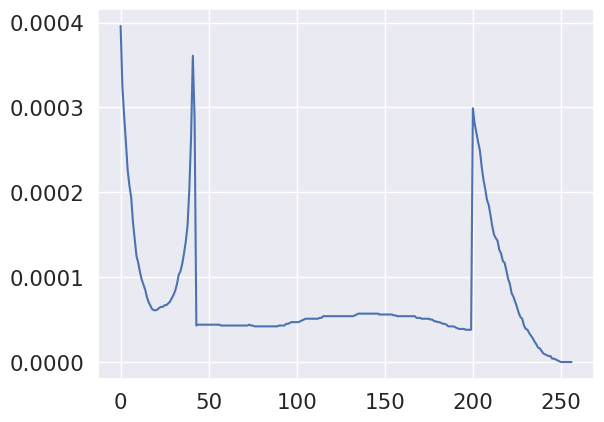

In [22]:
result = np.load(data_path + type + 'result/hamming_kappa'+str(0.0)+'.npy',allow_pickle = True)
plt.plot(result[0])